In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Deep Learning for Regression

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(309, 10)

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Dense(128, activation="relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs=100)

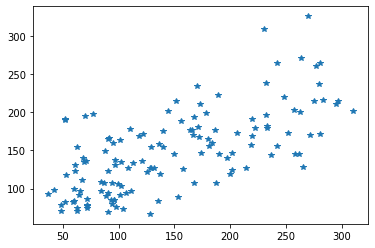

In [ ]:
ypred = mdl.predict(X_test)
plt.plot(y_test, ypred, "*")

In [ ]:
mdl.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 2965.5583 - mape: 37.7238


[2965.558349609375, 37.72382736206055]

## Deep Learning for Binary Classification

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(398, 30)

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Dense(128, activation="relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "sigmoid"))

mdl.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=100)

In [ ]:
ypred = mdl.predict(X_test)
ypred_label = (ypred > 0.5).astype("int")
ypred_label

In [ ]:
mdl.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9825


[0.09603746980428696, 0.9824561476707458]

## Deep Learning for Multinomial Classification



In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(105, 4)

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Dense(128, activation="relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(3, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=100)

In [ ]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
mdl.evaluate(X_test,y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 1.0000


[0.010913037694990635, 1.0]

## Overfitting in Deep Learning

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Dense(512, activation="relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience=30)

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
history = mdl.fit(X_train, y_train, epochs=1000, verbose = 0, validation_split=0.1, callbacks=[early_stop])
mdl.evaluate(X_train, y_train)
mdl.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 10.5214 - mape: 10.1262


[10.521448135375977, 10.126232147216797]

(0.0, 20.0)

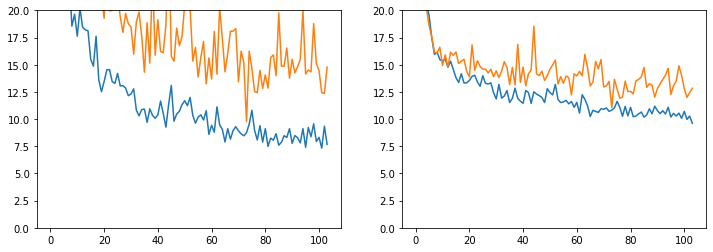

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylim([0,20])

plt.subplot(1,2,2)
plt.plot(history.history["mape"])
plt.plot(history.history["val_mape"])
plt.ylim([0,20])

## Multi Layer Perceptron for Image Analysis

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
plt.imshow(X_train[0], "gray")
print(labels[y_train[0]])

In [ ]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Dense(128, activation="relu", input_shape = (X_train.shape[1], ) ))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

In [ ]:
mdl.evaluate(X_test, y_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28)

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Flatten(input_shape = (28,28)))
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4941 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3696 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2781 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2543 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

## Convolutional Neural Networks

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.Conv2D(128, kernel_size = (3,3), activation="relu", input_shape = X_train.shape[1:] ))
mdl.add(layers.MaxPool2D(pool_size=(2,2)))
mdl.add(layers.Conv2D(64, kernel_size = (3,3), activation="relu" ))
mdl.add(layers.MaxPool2D(pool_size=(2,2)))
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 3ms/step - loss: 0.4594 - accuracy: 0.8322
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3009 - accuracy: 0.8892
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2548 - accuracy: 0.9050
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2234 - accuracy: 0.9173
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1988 - accuracy: 0.9250
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1761 - accuracy: 0.9338
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1561 - accuracy: 0.9412
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1390 - accuracy: 0.9469
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1252 - accuracy: 0.9519
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.11

'T-shirt'

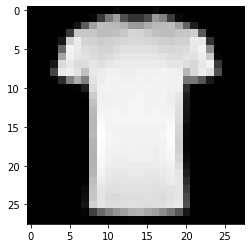

In [ ]:
from PIL import Image, ImageOps

test = Image.open("test1.png")
test = ImageOps.grayscale(test)
test = test.resize((28,28))
test_array = np.asarray(test)
plt.imshow(test_array, "gray")
test_array = test_array.reshape(1,28,28,1)
test_array = test_array / 255.0
labels[np.argmax(mdl.predict(test_array))]

In [ ]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)

In [ ]:
np.argmax(ypred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

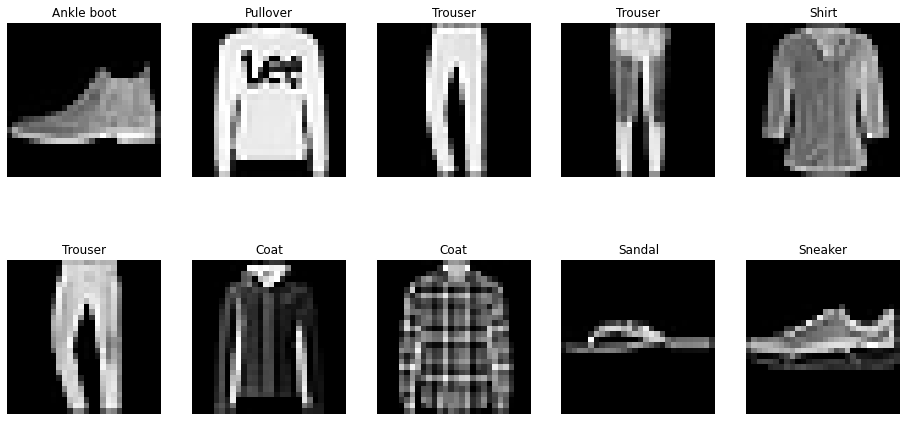

In [ ]:
plt.figure(figsize = (16,8))

for i in range(10):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title(labels[ypred_label[i]])
    plt.axis("off")

In [ ]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [ ]:
consumption = df["Consumption"]

def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])

    return np.array(X), np.array(y)

X, y = make_data(consumption, lag = 12)
X.shape

(118, 12)

In [ ]:
X_train = X[:-12]
y_train = y[:-12]

X_test = X[-12:]
y_test = y[-12:]

mu = y_train.mean()
sigma = y_train.std()

X_train = (X_train - mu) / sigma
y_train = (y_train - mu) / sigma

X_test = (X_test - mu) / sigma
y_test = (y_test - mu) / sigma

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_train.shape

(106, 12, 1)

In [ ]:
mdl = keras.Sequential()

mdl.add(layers.LSTM(64, input_shape = X_train.shape[1:]))
mdl.add(layers.Dense(64, activation="relu"))
mdl.add(layers.Dense(1))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs=100)

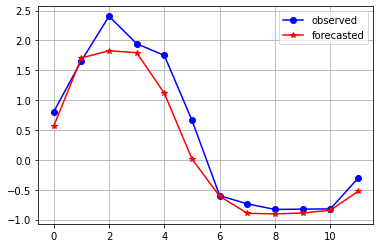

In [ ]:
ypred = mdl.predict(X_test)

plt.plot(y_test, "-ob", label = "observed")
plt.plot(ypred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 784)

In [ ]:
mdl = keras.Sequential()


mdl.add(layers.Dense(512, activation="relu", input_shape = (784, )))
mdl.add(layers.Dense(256, activation="relu"))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(28*28, activation="sigmoid"))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0165 - mae: 0.0720
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0085 - mae: 0.0510
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0069 - mae: 0.0459
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0061 - mae: 0.0430
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0055 - mae: 0.0411
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0051 - mae: 0.0395
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0048 - mae: 0.0383
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0046 - mae: 0.0374
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0044 - mae: 0.0366
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0043 - mae: 0.0359


In [ ]:
X_test_reconstructed = mdl.predict(X_test)

plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,5, i + 5 + 1)
    plt.imshow(X_test_reconstructed[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")

In [ ]:
noise_factor = 0.2

X_train_noisy = X_train + noise_factor * np.random.normal(size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size = X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0,1)
X_test_noisy = np.clip(X_test_noisy, 0,1)

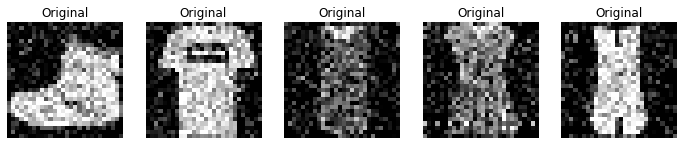

In [ ]:
plt.figure(figsize = (12,6))

for i in range(5):
    plt.subplot(1,5, i + 1)
    plt.imshow(X_train_noisy[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")

In [ ]:
mdl = keras.Sequential()


mdl.add(layers.Dense(512, activation="relu", input_shape = (784, )))
mdl.add(layers.Dense(256, activation="relu"))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(28*28, activation="sigmoid"))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train_noisy, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0197 - mae: 0.0802
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0120 - mae: 0.0605
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0106 - mae: 0.0562
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0098 - mae: 0.0539
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0094 - mae: 0.0524
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0091 - mae: 0.0513
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - mae: 0.0505
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0087 - mae: 0.0499
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0085 - mae: 0.0493
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0084 - mae: 0.0489


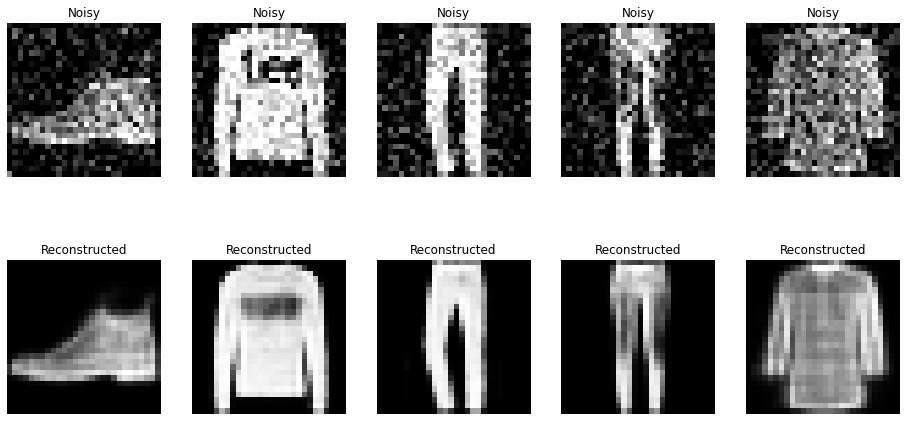

In [ ]:
X_test_reconstructed = mdl.predict(X_test_noisy)

plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28,28), "gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(2,5, i + 5 + 1)
    plt.imshow(X_test_reconstructed[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")